# S&P500 

- S&P 500 Price：https://stooq.com/q/d/?s=%5Espx
- S&P 500 PE Ratio（inflation adjusted, constant June, 2023 dollars.）：https://www.multpl.com/s-p-500-pe-ratio/table/by-month
- S&P 500 Earnings Per Share（inflation adjusted, constant June, 2023 dollars.）：https://www.multpl.com/s-p-500-earnings
- R-CPI-U-RS：https://www.census.gov/topics/income-poverty/income/guidance/current-vs-constant-dollars.html

In [1]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_date = '1963-01-01'

In [3]:
# S&P500 株価データ
price = pd.read_csv('data/spx_d.csv', sep=',',index_col='Date',parse_dates=True)
price = price.resample('M').first()
price = price[start_date:]

# S&P500 PERデータ （inflation adjusted）
per = pd.read_csv('data/s-p-500-pe-ratio.csv', sep='\t',index_col='Date',parse_dates=True)
per = per.resample('M').first()
per = per[start_date:]

# S&P500 利回り
y = per
y['Value'] = 1.0 / y['Value'] * 100.0

# S&P500 EPS（Earnings Per Share, 一株利益）（inflation adjusted）
eps = pd.read_csv('data/s-p-500-earnings.csv', sep='\t',index_col='Date',parse_dates=True)
eps = eps.resample('M').first()
eps = eps[start_date:]

# FRED US10Y(10年債利回り)データ
us10y = pd.read_csv('data/DGS10.csv', sep=',',index_col='DATE',parse_dates=True)
us10y = us10y.resample('M').first()
us10y = us10y[start_date:]

# FRED CPIデータ
cpi = pd.read_csv('data/CPIAUCSL.csv', sep=',',index_col='DATE',parse_dates=True)
cpi = cpi.resample('M').first()
cpi = cpi[start_date:]

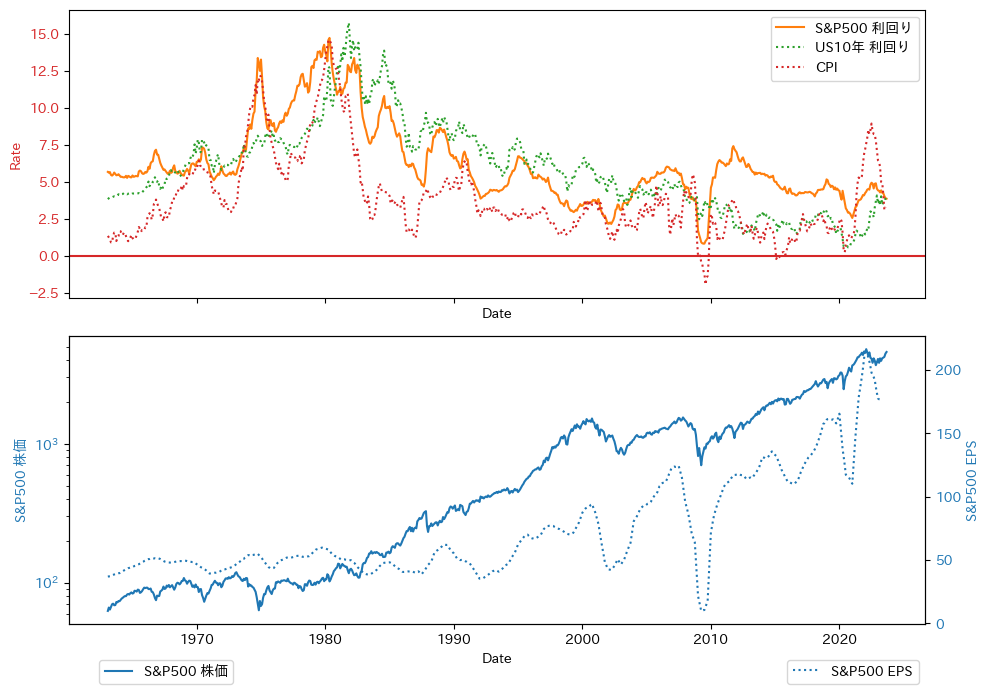

In [19]:
# グラフを描画
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

#  利回りをプロット（左側のY軸）
ax1.plot(y.index, y['Value'], label='S&P500 利回り', color='tab:orange')

# US10Yをプロット（左側のY軸）
ax1.plot(us10y.index, us10y['DGS10'], label='US10年 利回り', color='tab:green', linestyle='dotted')

# CPIをプロット（左側のY軸）
ax1.plot(cpi.index, cpi['CPIAUCSL_PC1'], label='CPI', color='tab:red', linestyle='dotted')

ax1.axhline(y=0.0, color='tab:red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rate', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend()

# 株価をプロット（左側のY軸）
ax3.plot(price.index, price['Close'], label='S&P500 株価', color='tab:blue')

ax3.set_xlabel('Date')
ax3.set_ylabel('S&P500 株価', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')
ax3.set_yscale('log')
ax3.legend(bbox_to_anchor=(0.2, -0.1))

# 右側のY軸を作成
ax4 = ax3.twinx()

# EPSをプロット（右側のY軸）
ax4.plot(eps.index, eps['Value'], label='S&P500 EPS', color='tab:blue', linestyle='dotted')

ax4.set_xlabel('Date')
ax4.set_ylabel('S&P500 EPS', color='tab:blue')
ax4.tick_params(axis='y', labelcolor='tab:blue')
ax4.legend(bbox_to_anchor=(1, -0.1))

# グラフを表示
plt.tight_layout()
plt.show()

# 1963-01-31 〜 2023-07-31の変化
- S&P500 株価は73倍
- 要因：インフレ 10.6、実質EPS(一株利益) 4.8、実質利回り低下 1.4（0.7の逆数）の掛け算で、73倍

In [21]:
# start_dateからのトータルのインフレ率
inflation = 1.0
for num in cpi['CPIAUCSL_PC1']:
    inflation = (1.0 + num / 100.0 / 12.0) * inflation

# start_dateからのS&P500 株価、EPS、利回りの変動率 (Rate Of Change)
price_roc= price['Close'][-1] / price['Close'][0]
eps_roc = eps['Value'][-1] / eps['Value'][0]
yield_roc = y['Value'][-1]/y['Value'][0]

# start_dateからのUS10年債利回りの変動率 (Rate Of Change)
us10y_roc = us10y['DGS10'][-1] / us10y['DGS10'][0]

print('Rate of change from %s to %s' % (
    cpi.index[0].strftime('%Y-%m-%d'),
    cpi.index[-1].strftime('%Y-%m-%d'))
     )
print('S&P500 Price : ', round(price_roc, 1))
print('S&P500 EPS : ', round(eps_roc, 1), ' (Inflation adjusted)')
print('S&P500 Yield : ', round(yield_roc, 1), ' (Inflation adjusted)')
print('Inflation rate : %.1f' % round(inflation, 1))
print('US10 Yield : ', round(us10y_roc, 1))


Rate of change from 1963-01-31 to 2023-07-31
S&P500 Price :  73.0
S&P500 EPS :  4.8  (Inflation adjusted)
S&P500 Yield :  0.7  (Inflation adjusted)
Inflation rate : 10.6
US10 Yield :  1.1


# S&P500
1. S&P 500 Earnings per Share（名目）：https://www.gurufocus.com/economic_indicators/58/sp-500-earnings-per-share
2. S&P 500 Earnings Yield：https://www.gurufocus.com/economic_indicators/151/sp-500-earnings-yield
3. S&P 500 Earnings Yield with Forward Estimate：https://www.gurufocus.com/economic_indicators/6062/sp-500-earnings-yield-with-forward-estimate

2と3は予測を含むかどうかの違いのみ。過去の値は同一（おそらく予測値ではなく実績値）

In [22]:
y2 = pd.read_csv('data/S&P 500 Earnings Yield with Forward Estimate 2023-08-19 03_23_52.csv', sep='\t',index_col='Date',parse_dates=True)
y2 = y2.resample('M').first()
y2 = y2[start_date:]

eps2 = pd.read_csv('data/S&P 500 Earnings per Share 2023-08-19 12_10_09.csv', sep='\t',index_col='Date',parse_dates=True)
eps2 = eps2.resample('M').first()
eps2 = eps2[start_date:]

diff = y2['Value'] - us10y['DGS10']

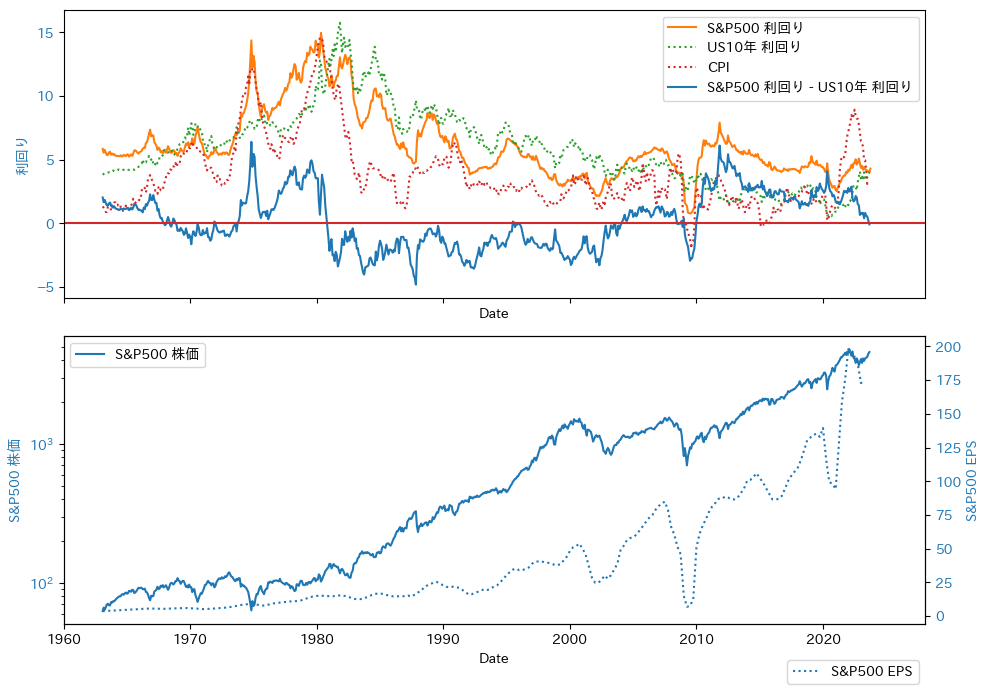

In [23]:
# グラフを描画
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

#  利回りをプロット（左側のY軸）
ax1.plot(y2.index, y2['Value'], label='S&P500 利回り', color='tab:orange')
ax1.plot(us10y.index, us10y['DGS10'], label='US10年 利回り', color='tab:green', linestyle='dotted')
ax1.plot(cpi.index, cpi['CPIAUCSL_PC1'], label='CPI', color='tab:red', linestyle='dotted')
ax1.plot(diff.index, diff, label='S&P500 利回り - US10年 利回り', color='tab:blue')
ax1.axhline(y=0.0, color='tab:red')
ax1.set_xlabel('Date')
ax1.set_ylabel('利回り', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend()

# 株価をプロット（左側のY軸）
ax3.plot(price.index, price['Close'], label='S&P500 株価', color='tab:blue')
ax3.set_xlabel('Date')
ax3.set_ylabel('S&P500 株価', color='tab:blue')
ax3.tick_params(axis='y', labelcolor='tab:blue')
ax3.set_yscale('log')
ax3.legend()

# 右側のY軸を作成
ax4 = ax3.twinx()

# EPSをプロット（左側のY軸）
ax4.plot(eps2.index, eps2['Value'], label='S&P500 EPS', color='tab:blue', linestyle='dotted')
ax4.set_xlabel('Date')
ax4.set_ylabel('S&P500 EPS', color='tab:blue')
ax4.tick_params(axis='y', labelcolor='tab:blue')
ax4.legend(bbox_to_anchor=(1, -0.1))

# グラフを表示
plt.tight_layout()
plt.show()